# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean, median, mode, stdev


In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████████████| 8.61M/8.61M [00:09<00:00, 939kB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
news_soup = soup(html, 'html.parser')
#slide_elem = news_soup.select_one('div.list_text')

In [5]:
# Extract all rows of data
rows = news_soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_list =[]
#rows = table.find_all('tr')
# Loop through the scraped data to create a list of rows
for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    mars_list.append(row)

In [7]:
mars_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_list_df = pd.DataFrame(mars_list, columns = ["id","terrestrial_date", "sol","ls","month","min_temp","pressure"])

In [9]:
# Confirm DataFrame was created successfully
mars_list_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_list_df.dtypes 

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
mars_list_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [12]:
# Change data types for data analysis
mars_list_df["terrestrial_date"] = mars_list_df["terrestrial_date"].astype("datetime64[ns]")
mars_list_df["min_temp"] = mars_list_df["min_temp"].astype("float")
mars_list_df["pressure"] = mars_list_df["pressure"].astype("float")

In [13]:
# Confirm type changes were successful by examining data types again
mars_list_df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
count = mars_list_df.month.nunique()
count

12

In [15]:
mars_list_df.month.value_counts()

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

In [16]:
# 2. How many Martian days' worth of data are there?
count_date = mars_list_df.terrestrial_date.nunique()
count_date

1867

In [17]:
# 3. What is the average low temperature by month?
min_temp = mars_list_df.groupby(["month"]).min()["min_temp"]
min_temp

month
1    -82.0
10   -81.0
11   -78.0
12   -81.0
2    -86.0
3    -90.0
4    -89.0
5    -85.0
6    -84.0
7    -78.0
8    -75.0
9    -78.0
Name: min_temp, dtype: float64

Text(0, 0.5, 'temp')

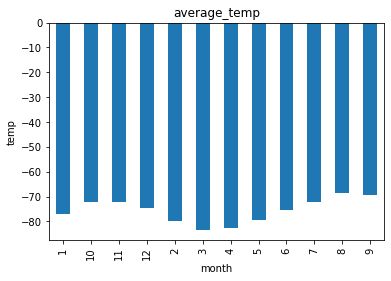

In [18]:
# Plot the average temperature by month
average_temp = mars_list_df.groupby(["month"]).mean()["min_temp"]
average_temp.plot(kind ="bar")
plt.title('average_temp')
plt.ylabel('temp')

Text(0, 0.5, 'Temperature in Celcius')

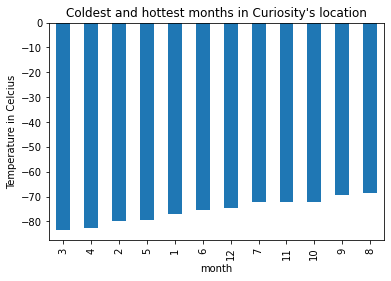

In [19]:
# Identify the coldest and hottest months in Curiosity's location
average_temp.sort_values().plot(kind ="bar")
plt.title("Coldest and hottest months in Curiosity's location")
plt.ylabel('Temperature in Celcius')

In [20]:
mars_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   object        
 3   ls                1867 non-null   object        
 4   month             1867 non-null   object        
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 102.2+ KB


In [21]:
# 4. Average pressure by Martian month
mars_list_df.groupby(["month"]).mean()["pressure"]

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64

Text(0, 0.5, 'Pressure')

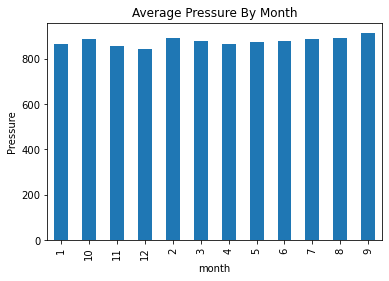

In [22]:
# Plot the average pressure by month
average_preasure = mars_list_df.groupby(["month"]).mean()["pressure"]
average_preasure.sort_values().plot(kind ="bar")
average_preasure.plot(kind ="bar")
plt.title('Average Pressure By Month')
plt.ylabel('Pressure')

In [23]:
# Scraped HTML table by using the Pandas
gal_data = pd.read_html('https://galaxyfacts-mars.com', index_col=0)
gal_data

[                                       1                2
 0                                                        
 Mars - Earth Comparison             Mars            Earth
 Diameter:                       6,779 km        12,742 km
 Mass:                    6.39 × 10^23 kg  5.97 × 10^24 kg
 Moons:                                 2                1
 Distance from Sun:        227,943,824 km   149,598,262 km
 Length of Year:           687 Earth days      365.24 days
 Temperature:                -87 to -5 °C      -88 to 58°C,
                                                   1
 0                                                  
 Equatorial Diameter:                       6,792 km
 Polar Diameter:                            6,752 km
 Mass:                 6.39 × 10^23 kg (0.11 Earths)
 Moons:                        2 ( Phobos & Deimos )
 Orbit Distance:            227,943,824 km (1.38 AU)
 Orbit Period:                  687 days (1.9 years)
 Surface Temperature:                   -87 

In [24]:
#gal_data turn to dataframe
df = gal_data[0]
df

,1,2
0,,
Mars - Earth Comparison,Mars,Earth
Diameter:,"6,779 km","12,742 km"
Mass:,6.39 × 10^23 kg,5.97 × 10^24 kg
Moons:,2,1
Distance from Sun:,"227,943,824 km","149,598,262 km"
Length of Year:,687 Earth days,365.24 days
Temperature:,-87 to -5 °C,-88 to 58°C


In [25]:
#How many terrestrial (earth) days are there in a Martian year?
mars_days = df.iat[5,0]
mars_days

'687 Earth days'

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
df.to_csv('MOdule11', index = False) 

In [27]:
browser.quit()